# Importing Libraries


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Loading Data

In [9]:

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

In [13]:
# Print the first few rows of the features and target
print("Feature matrix (X):")
print(X[:5])  # Print the first 5 samples of features

print("\nTarget variable (y):")
print(y[:5])  # Print the first 5 target values

# Optional: Print the feature names and target names
print("\nFeature names:")
print(iris.feature_names)

print("\nTarget names:")
print(iris.target_names)

Feature matrix (X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target variable (y):
[0 0 0 0 0]

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
['setosa' 'versicolor' 'virginica']


# Splitting Data


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Output the results
print("Training features:", X_train)
print("Training labels:", y_train)
print("Testing features:", X_test)
print("Testing labels:", y_test)

Creating Decision tree to make predictions of Data

In [17]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [18]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [23]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [25]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Interpretations

For every class, the deep learning model realized a flawless performance on measure of precision, recall and F1-score as presented in this study. Thus:

The model did not misclassify any cases within the testing data.
There were no positive or negative predictions error for each class.
Cross-Validation: To ensure that these results are not due to a lucky split, consider using cross-validation for more robust performance evaluation.

In [26]:
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean cross-validation score: 0.9666666666666668


The model's performance is robust across different folds, indicating that it is likely not overfitting to any specific subset of the data.

# Plotting The Decision Tree

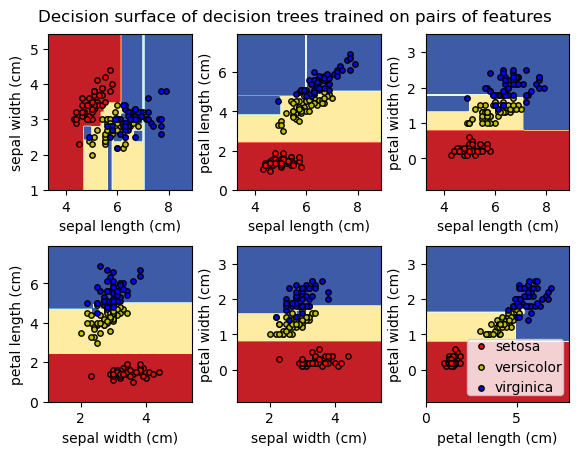

In [4]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")


[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666

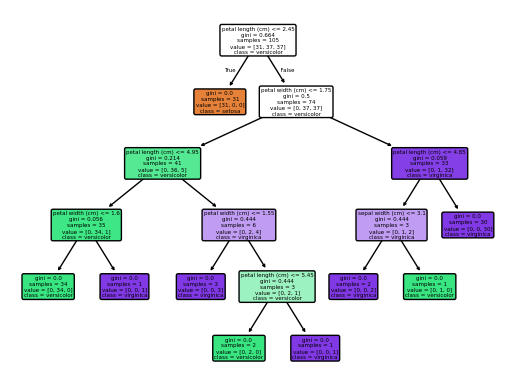

In [24]:
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)